# Machine Learning Report Credit Scoring
- **Nama:** Radiga
- **Email:** radiga03@gmail.com
- **ID Dicoding:** radiga_gubarda

##**Domain Project** (Background)

Saat ini industri Perbankan dan Fintech mengalami kemajuan yang pesat seiring dengan kemajuan teknologi. Banyak product yang ditawarkan oleh perbankan dan Fintech seperti Tabungan, Deposito, serta Pinjaman. Pemberian pinjaman kepada individu atau perusahaan memiliki risiko gagal bayar. Rasio kredit NPL di Perbankan di Indonesia hingga Maret 2023 sebesar 2,49% . Hal tersebut membuat bank dan fintech dapat menghadapi kerugian yang tinggi akibat dari gagal bayar. Metode manual dalam menilai Credit Scoring memiliki kelemahan seperti rentan terhadap kesalahan , subjektivitas, dan butuh waktu. Hal tersebut membuat proses credit scoring tidaklah efisien.


Source: https://ojk.go.id/id/kanal/perbankan/data-dan-statistik/laporan-profil-industri-perbankan/Documents/Laporan%20Surveillance%20Perbankan%20Indonesia%20-%20Triwulan%20I%202023.pdf

##**Business Understanding**




###Problem Statement

1. Pemberian pinjaman kepada individu atau perusahaan memiliki risiko gagal bayar yang dapat menimbulkan kerugian bagi bank dan fintech.

2. Metode manual dalam menilai credit scoring rentan terhadap kesalahan, memiliki tingkat subjektivitas yang tinggi, dan memerlukan waktu untuk diproses.

3. Proses penilaian credit scoring manual tidak efisien yang dapat menghambat keputusan pinjaman yang cepat dan akurat.


###Goals


1. Mengurangi Risiko Gagal Bayar: Membuat model prediktif yang dapat membantu perbankan dan fintech mengidentifikasi nasabah dengan risiko gagal bayar rendah, sehingga dapat mengurangi kerugian.

2. Meningkatkan Efisiensi Penilaian Kredit: Mengembangkan sistem berbasis data yang otomatis dan akurat untuk memberikan penilaian credit scoring secara objektif, mengurangi subjektivitas, serta mempercepat proses pengambilan keputusan pinjaman.

3. Mengoptimalkan Pemberian Pinjaman dengan mempertimbangkan berbagai faktor seperti pendapatan, keterlambatan pembayaran, dan riwayat kredit untuk mengurangi tingkat kesalahan dalam penilaian.

###Solution

Menggunakan empat model untuk membandingkan dan memberikan solusi yang terbaik dalam membuat Credit Scoring Predictive yang efektif dan efisien. Adapun model yang digunakan adalah Random Forest, Logistic Regresion, Decision Tree, dan Gradien Boosting. Metrik evaluasi menggunakan Mean Squared Error (MSE) untuk mengukur seberapa besar model salah dalam melakukan predictive sementara R-squared digunakan untuk mengetahui seberapa baik model dalam mengevaluasi pola data.

##**Data Understanding**

Melakukan Data Acquisition Credit Scoring dari Kaggle https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data . Dataset ini memiliki 100.000 data yang terdiri dari 28 Columns. Dataset ini menjelaskan mengenai informasi customers termasuk data-data demografi, payment behaviour, credit score. Tujuan dari project ini adalah membuat sistem yang efektif dalam melakukan prediksi peminjam berdasarkan tiga kategori Good, Standard, dan Poor.

**Dataset**

ID: Unique identifier.

Customer_ID: ID untuk setiap konsumen.

Month: Bulan.

Name: Nama konsumen.

Age: Umur Konsumen.

SSN: Social Security Number of the customer.

Occupation: Pekerjaan konsumen.

Annual_Income: Pendapatan tahunan.

Monthly_Inhand_Salary: Pendapatan bersih setiap bulan.

Num_Bank_Accounts: Jumlah akun bank milik konsumen.

Num_Credit_Card: Jumlah kartu kredit yang dimiliki konsumen.

Interest_Rate: Sukuk bunga.

Num_of_Loan: Jumlah pinjaman konsumen.

Type_of_Loan: Tipe pinjaman konsumen.

Delay_from_due_date: Keterlambatan bayar oleh konsumen.

Num_of_Delayed_Payment: Jumlah dana yang telat dibayar oleh konsumen.

Changed_Credit_Limit: limit karu kredit yang idubah.

Num_Credit_Inquiries: Jumlah permintaan kredit yang dilakukan oleh nasabah.

Credit_Mix: Campuran dari berbagai jenis rekening kredit yang dimiliki oleh nasabah.

Outstanding_Debt: Jumlah Outstanding debt.

Credit_Utilization_Ratio: Rasio kartu kredit yang dapat digunakan.

Credit_History_Age: Umur kartu kredit.

Payment_of_Min_Amount: Minimum pembayaran yang dilakukan.

Total_EMI_per_month: Total Equated Monthly Installment (EMI) yang dibayar oleh konsumen.

Amount_invested_monthly: Jumlah investasi bulanan.

Payment_Behaviour: Cara Bayar Konsumen.

Monthly_Balance: Jumlah saldo bulanan.

Credit_Score: Credit score konsumen.

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install kaggle

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile
import os


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
#Get Data set from Kaggle
!kaggle datasets download -d parisrohan/credit-score-classification

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
 53% 5.00M/9.51M [00:00<00:00, 34.6MB/s]
100% 9.51M/9.51M [00:00<00:00, 56.3MB/s]


In [6]:
# Define the path to the zip file and the directory to extract it to
zip_file_path = "/content/credit-score-classification.zip"
extract_dir = "/content/credit-score"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [7]:
df_train = pd.read_csv('/content/credit-score/train.csv')

df_train.info()

<ipython-input-7-ef3846a4b83d>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/credit-score/train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


###Exploratory Data Analysis (EDA)

Proses menganalisis dataset secara visual dan statistik untuk memahami pola, tren, hubungan, dan anomali sebelum menerapkan model.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [11]:
df_train.describe(include = 'object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


## Data Preparation

Pada tahap ini akan melakukan cleaning data untuk membuat credit scoring predictive. Tahap pertama menghilangkan column yang tidak dibutuhkan dalam proses pembuatan credit scoring. Tahap kedua mengubah tipe data menjadi numeric agar dapat menghilangkan missing value dan mengubah unique value. Tahap ketiga Mengubah data Credit_Mix, Payment_Behaviour, Credit_Score, dan Occupation menjadi label agar mudah dalam melakukan klasifikasi. Tahap selanjutnya Menentukan korelasi dari setiap hubungan data semakin mendekati satu maka saling terkaitan begitupun sebaliknya. Tahap akhir adalah melakukan split data untuk training dan validation.

In [12]:
df_train.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [13]:
df_train.duplicated().sum()

0

In [14]:
#Menghapus column yang tidak dibutuhkan
df_train.drop(['Customer_ID','Type_of_Loan','ID','Month','SSN','Name', 'Payment_of_Min_Amount'],axis=1,inplace=True)

In [15]:
#Mengubah tipe data dari object menjadi numeric untuk menghilangkan missing value
for i in df_train.columns:
    print(f'{i}:{pd.api.types.infer_dtype(df_train[i])}')

Age:string
Occupation:string
Annual_Income:string
Monthly_Inhand_Salary:floating
Num_Bank_Accounts:integer
Num_Credit_Card:integer
Interest_Rate:integer
Num_of_Loan:string
Delay_from_due_date:integer
Num_of_Delayed_Payment:string
Changed_Credit_Limit:string
Num_Credit_Inquiries:floating
Credit_Mix:string
Outstanding_Debt:string
Credit_Utilization_Ratio:floating
Credit_History_Age:string
Total_EMI_per_month:floating
Amount_invested_monthly:string
Payment_Behaviour:string
Monthly_Balance:mixed
Credit_Score:string


In [16]:
for col in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

In [17]:
for i in df_train.columns:
    print(f'{i}:{pd.api.types.infer_dtype(df_train[i])}')

Age:string
Occupation:string
Annual_Income:string
Monthly_Inhand_Salary:floating
Num_Bank_Accounts:integer
Num_Credit_Card:integer
Interest_Rate:integer
Num_of_Loan:string
Delay_from_due_date:integer
Num_of_Delayed_Payment:floating
Changed_Credit_Limit:string
Num_Credit_Inquiries:floating
Credit_Mix:string
Outstanding_Debt:string
Credit_Utilization_Ratio:floating
Credit_History_Age:string
Total_EMI_per_month:floating
Amount_invested_monthly:floating
Payment_Behaviour:string
Monthly_Balance:floating
Credit_Score:string


In [18]:
df_train.dropna(inplace=True)
df_train[['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']]

,Monthly_Inhand_Salary,Num_of_Delayed_Payment,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance
0,1824.843333,7.0,4.0,80.415295,312.494089
8,3037.986667,4.0,2.0,104.291825,470.690627
9,3037.986667,1.0,2.0,40.391238,484.591214
10,3037.986667,-1.0,2.0,58.515976,466.466476
12,3037.986667,1.0,2.0,130.115420,444.867032
...,...,...,...,...,...
99994,3359.415833,6.0,3.0,140.581403,410.256158
99995,3359.415833,7.0,3.0,60.971333,479.866228
99996,3359.415833,7.0,3.0,54.185950,496.651610
99997,3359.415833,6.0,3.0,24.028477,516.809083


In [19]:
df_train['Age'] = pd.to_numeric(df_train['Age'].fillna('0').str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)
df_train['Num_of_Loan'] = pd.to_numeric(df_train['Num_of_Loan'].fillna('0').str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)
df_train['Annual_Income'] = pd.to_numeric(df_train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
df_train['Changed_Credit_Limit'] = pd.to_numeric(df_train['Changed_Credit_Limit'].replace('_', np.nan), errors='coerce').fillna(0)
df_train['Outstanding_Debt'] = pd.to_numeric(df_train['Outstanding_Debt'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce').fillna(0)
df_train['Occupation'] = df_train['Occupation'].str.replace("_______" , "Other")
df_train = df_train[df_train['Payment_Behaviour'] != '!@9#%8' ]
df_train = df_train[df_train['Credit_Mix'] != '_']

In [20]:
def parse_years_and_months(age):
    if isinstance(age, str):
        years = int(age.split(' Years')[0]) if 'Years' in age else 0
        months = int(age.split('and ')[-1].split(' Months')[0]) if 'Months' in age else 0
        return years * 12 + months
    return 0

df_train['Credit_History_Age_Months'] = df_train['Credit_History_Age'].apply(parse_years_and_months)

In [21]:
df_train.drop(['Credit_History_Age'],axis=1,inplace=True)

In [22]:
df_train.describe(include='object').T

,count,unique,top,freq
Occupation,45510,16,Other,3221
Credit_Mix,45510,3,Standard,20899
Payment_Behaviour,45510,6,Low_spent_Small_value_payments,12290
Credit_Score,45510,3,Standard,24345


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

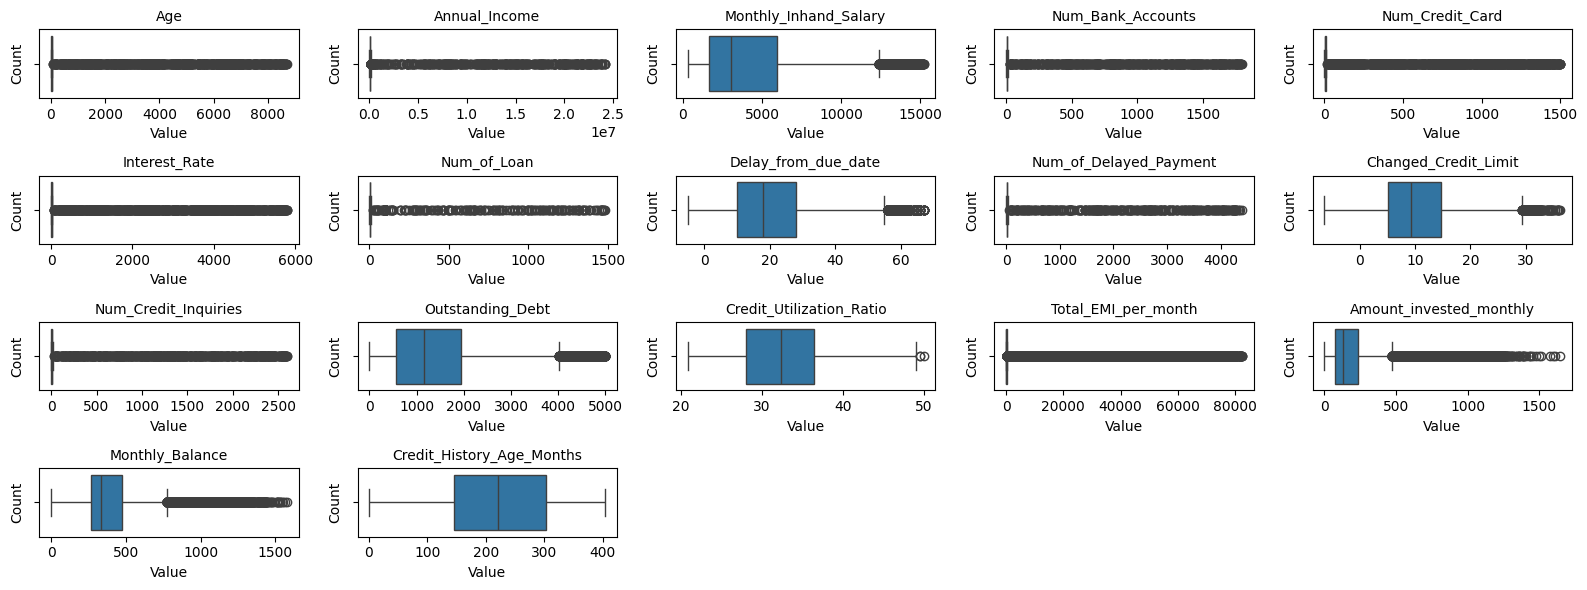

In [23]:
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

num_columns = 5
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df_train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Labeling

In [24]:
df_train[['Credit_Mix', 'Payment_Behaviour', 'Credit_Score' ,'Occupation']]

,Credit_Mix,Payment_Behaviour,Credit_Score,Occupation
8,Good,Low_spent_Small_value_payments,Standard,Other
9,Good,High_spent_Large_value_payments,Good,Teacher
12,Good,Low_spent_Small_value_payments,Good,Teacher
13,Good,High_spent_Large_value_payments,Good,Teacher
15,Good,Low_spent_Small_value_payments,Good,Teacher
...,...,...,...,...
99984,Bad,High_spent_Large_value_payments,Poor,Architect
99985,Bad,Low_spent_Small_value_payments,Poor,Architect
99986,Bad,Low_spent_Small_value_payments,Poor,Architect
99991,Bad,High_spent_Large_value_payments,Standard,Architect


In [25]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

df_train['Credit_Mix_Encoded'] = encoder.fit_transform(df_train[['Credit_Mix']])

In [26]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

df_train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(df_train[['Payment_Behaviour']])

In [27]:
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

df_train['Credit_Score_Encoded'] = encoder.fit_transform(df_train[['Credit_Score']])

In [28]:
label_encoder = LabelEncoder()
df_train['Occupation_Encoded'] = label_encoder.fit_transform(df_train['Occupation'])

In [29]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
df_train.drop(columns=columns_to_drop, inplace=True)

In [30]:
df_train.to_csv("cleaned_dataset.csv", index=False)


In [31]:
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Credit_Mix_Encoded,Payment_Behaviour_Encoded,Credit_Score_Encoded,Occupation_Encoded
0,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,605.03,24.464031,18.816215,104.291825,470.690627,319,2.0,0.0,1.0,12
1,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,...,605.03,38.550848,18.816215,40.391238,484.591214,320,2.0,5.0,2.0,14
2,28,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,...,605.03,34.977895,18.816215,130.115420,444.867032,323,2.0,0.0,2.0,14
3,28,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,...,605.03,33.381010,18.816215,43.477190,481.505262,324,2.0,5.0,2.0,14
4,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,605.03,32.933856,18.816215,218.904344,356.078109,326,2.0,0.0,2.0,14


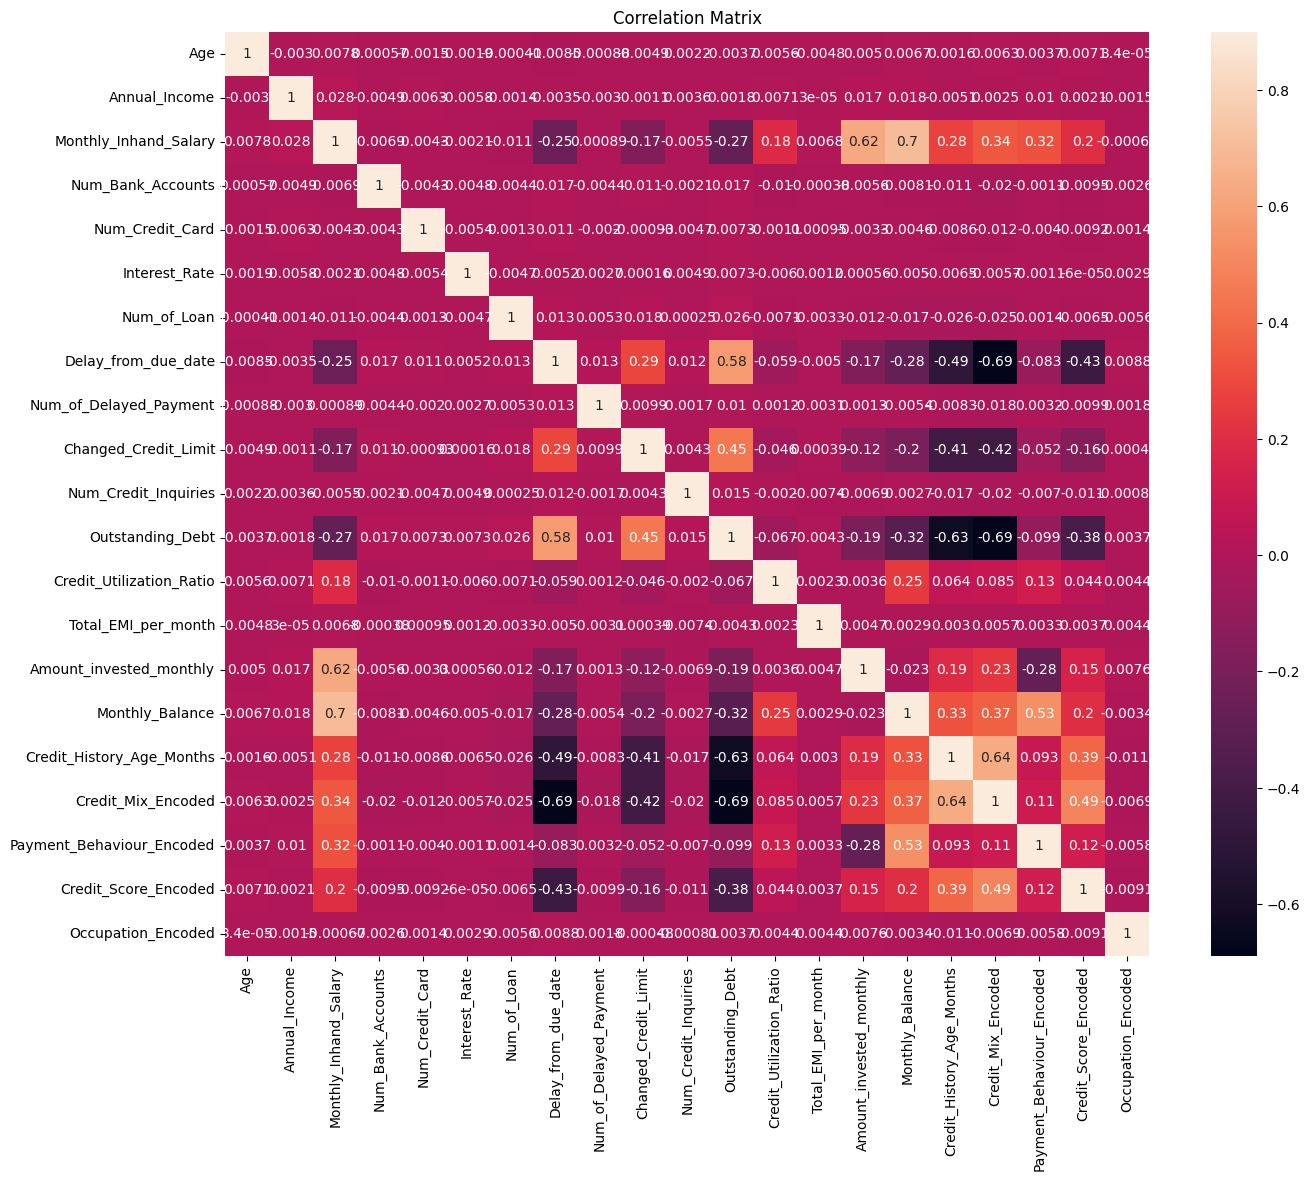

In [32]:
#Menentukan korelasi dari setiap hubungan data semakin mendekati satu maka saling terkaitan begitupun sebaliknya
correlation = df_train.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation , vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Split Dataset

In [33]:
y = df_train['Credit_Score_Encoded']

X = df_train[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Credit_History_Age_Months', 'Credit_Mix_Encoded', 'Amount_invested_monthly',
       'Occupation_Encoded', 'Monthly_Balance', 'Payment_Behaviour_Encoded']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

Random Forest Model

In [34]:
model_rf = RandomForestRegressor(n_estimators=200,  random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
print("Random Forest Mean Squared Error:", mse_rf)

r2_rf = r2_score(y_test, y_pred)
print("Random Forest R-squared:", r2_rf)


Random Forest Mean Squared Error: 0.202673099318831
Random Forest R-squared: 0.5544745804788942


Logistic Regression

In [35]:
model_lr = LogisticRegression(penalty='l1', solver='liblinear')

model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
print("Logistic Regression Mean Squared Error:", mse_lr)

r2_lr = r2_score(y_test, y_pred)
print("Logistic Regression R-squared:", r2_lr)

Logistic Regression Mean Squared Error: 0.486376620522962
Logistic Regression R-squared: -0.06917567566707006


Decision Tree

In [36]:
tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R-squared: {r2_tree}")


Decision Tree MSE: 0.3966161283234454
Decision Tree R-squared: 0.12814000696676697


Gradient Boosting

In [37]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MSE: {mse_gbr}")
print(f"Gradient Boosting R-squared: {r2_gbr}")


Gradient Boosting MSE: 0.26019911966608555
Gradient Boosting R-squared: 0.4280182109126892


## Evaluasi dan Visualisasi

In [38]:
models = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting']
mse_values = [mse_rf, mse_lr, mse_tree, mse_gbr]
r2_values = [r2_rf, r2_lr, r2_tree, r2_gbr]

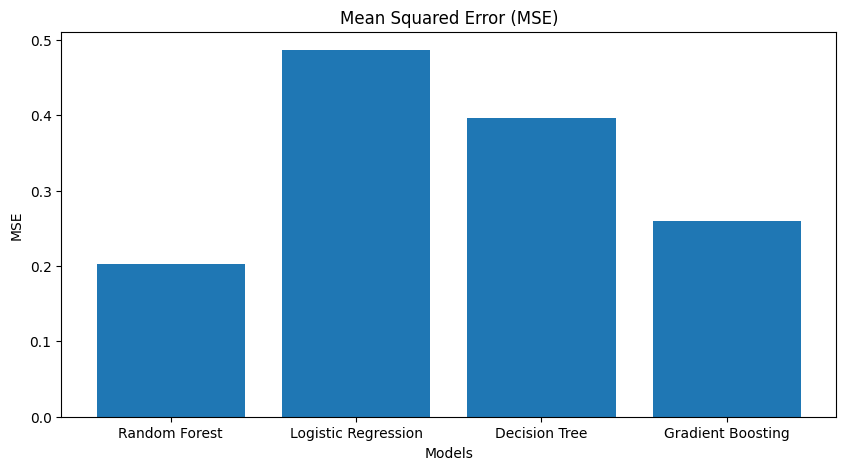

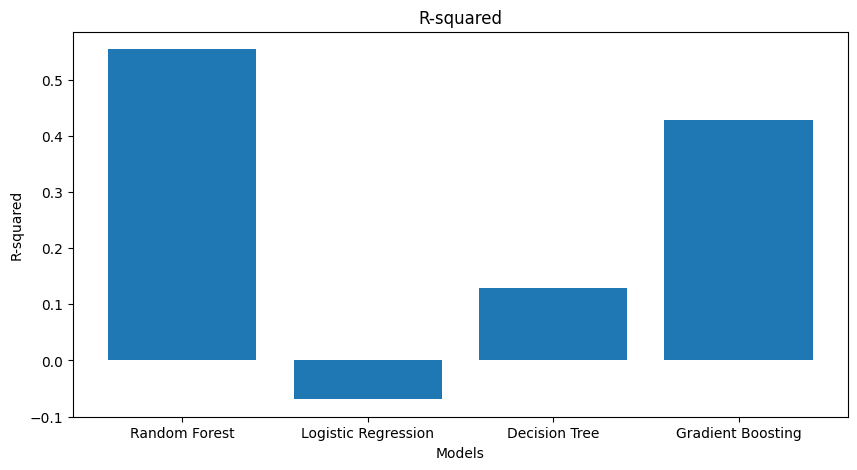

In [39]:
# MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

# R-squared
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values)
plt.title('R-squared')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.show()

**Kesimpulan**


---

Dari hasil yang didapat, Model Random Forest dengan Mean Squared Error (MSE) sebesar 0.2027 dan R-squared sebesar 0.5545, menunjukkan bahwa model ini memiliki tingkat kesalahan yang relatif rendah dibandingkan dengan model lainnya. Sebaliknya, Logistic Regression memiliki performa paling rendah dengan MSE sebesar 0.4873 dan R-squared negatif sebesar -0.0711.

Decision Tree memiliki MSE sebesar 0.3966 dan R-squared sebesar 0.1281 menunjukkan performa yang lebih baik daripada Logistic Regression, tapi masih jauh dari Random Forest. Sementara Gradient Boosting memiliki hasil yang baik dengan MSE sebesar 0.2602 dan R-squared sebesar 0.4280, meski masih di bawah Random Forest.

Dapat disimpulkan bahwa Random Forest adalah model terbaik untuk credit scoring berdasarkan hasil MSE dan R-squared, diikuti oleh Gradient Boosting, sedangkan Logistic Regression adalah yang paling tidak efektif.